### Machine Learning Algorithm:
___

* from **IBM corporation (sr.data scientis: Saeed Aghabozorgi)**
* coding by: **(Ahmad Ahmadi)**
___
### 2) Multiple Linear Regression:

* **regression:** is the process of predicting a continuous value.
* the key point in regression is, our dependent value should be continuous. however; the independent variable can be measured on either categorical or continuous measurment scale.

- so what we want to do here is, using some historical data and three features as inputs (multiple) to make a model predicting the amount of CO2 emissions.
- we use **regression** to build such a regression estimation model.
- because it's **Multiple Linear Regression**, we use three inputs and one output:

<br>1) ENGINE SIZE, CYLINDERS, FUEL CONSUMPTIN COMB **-->** CO2 EMISSIONS



In [1]:
# importing packages we need here:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# fit's a function that renders figures in a notebook (instead of displaying it in a new window as an object):
%matplotlib inline

In [2]:
# reading data:
data = pd.read_excel('fuel_consump.xlsx')
# take a look at 5 rows of data:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


___
*  **if you want to see statistical features of this data set you can use <u>DataFrame.describe()**
<br> **these features are:**
* count
* mean
* std = standard deviation
* mean = 50 %
* quartiles = 25% , 75%
* min
* max
___

In [3]:
# statistical features using describe():
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


___
* at this stage, we can select our probable **input / output** features from data above:
___

In [4]:
# feature selection:
features_data = data [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
# visualizing:
features_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


* it's better to plot these features to have a clear intuition about them:

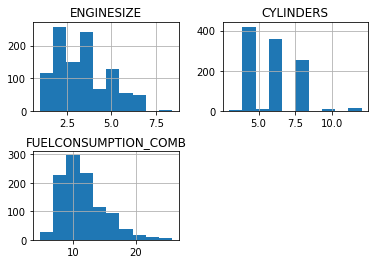

In [5]:
visualizing = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
# histogram plot:
visualizing.hist()
plt.subplots_adjust(hspace=0.45)
plt.show()

* to find the trend of these features corresponds to **'CO2 EMISSIONS'**, we can plot them.

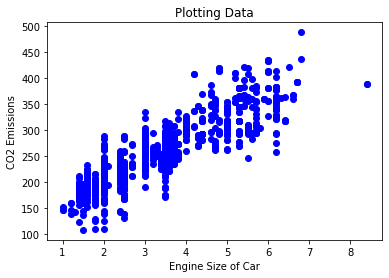

In [6]:
# plots:
plt.scatter(features_data.ENGINESIZE, features_data.CO2EMISSIONS, color='blue')
plt.title('Plotting Data')
plt.xlabel('Engine Size of Car')
plt.ylabel('CO2 Emissions')
plt.show()

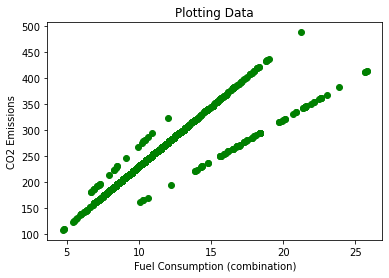

In [7]:
# plots:
plt.scatter(features_data.FUELCONSUMPTION_COMB, features_data.CO2EMISSIONS, color='green')
plt.title('Plotting Data')
plt.xlabel('Fuel Consumption (combination)')
plt.ylabel('CO2 Emissions')
plt.show()

___
* before starting to create our multiple linear regression, we need to split our data to **Train and Test sets.**
* there are **two ways** to do train/test split:
<br>1) using sklearn library: -- **form sklearn.model_selection import train_test_split()**
<br>2) you can create a **mask** to do so.
___

In [8]:
# creating a mask to split data to train / test:
# seed(1) = make a fixed random number for each run of this cell:
np.random.seed(1)
mask = np.random.rand(len(features_data)) < 0.8
train_data = features_data[mask]
test_data = features_data[~mask]


___

* now, we are ready to create our own **multiple linear regresison** using sklearn (scikit learn) library.
___

In [9]:
# creating Multiple Regression Model:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
x_train = train_data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']].to_numpy()
# or you can use: x_train = np.asarray(features_data['ENGINESIZE'])
y_train = train_data[['CO2EMISSIONS']].to_numpy()
# or you can use: y_train = np.asarray(features_data['CO2EMISSIONS'])
linear_reg.fit(x_train, y_train)
# the coefficients:
print('the coefficient:', linear_reg.coef_)
print('the intercept:', linear_reg.intercept_)

the coefficient: [[11.6160357   7.01931506  9.75964839]]
the intercept: [64.06598012]


 as you may notice, now because we have multiple inputs, consequently we have multiple coefficients:
- coef(1) = 11.616
- coef(2) = 7.019
- coef(3) = 9.759
and like always one intercept (b) 
- intercept = 67.065

$ y\hat \, =\, (coef_1 \times x_1) +(coef_2 \times x_2) + (coef_3 \times x_3)  $

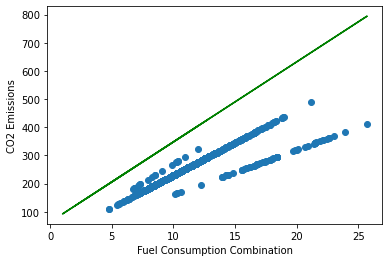

In [10]:
# plotting results:
plt.scatter(train_data.FUELCONSUMPTION_COMB, train_data.CO2EMISSIONS)
y_hat = linear_reg.coef_[0, 0] * x_train + linear_reg.coef_[0, 1] * x_train + linear_reg.coef_[0, 2] * x_train+ linear_reg.intercept_[0]
plt.plot(x_train, y_hat, color='green')
plt.xlabel('Fuel Consumption Combination')
plt.ylabel('CO2 Emissions')
plt.show()

___

* to find out the **accuracy of our model**, we can use **Mean Absolute Error**, **Mean Square Error**, **R2_score.**


* **Mean Absolute Error (MAE)**
$$MAE =\sum_{i}^{n}\left\lvert\frac{y_p^{(i)} - y_t^{(i)}}{n}\right\rvert$$
* **Mean Square Error (MSE)** 
$$ MSE = \sum_{i}^{n}\frac{(y_p^{(i)} - y_t^{(i)})^2}{n}$$
* **R2_score** 
$$ R2\,score = 1 - \frac{RSS^{*}}{TSS^{*}}$$
 <br> * RSS = Residual Sum of Squares
<br> * TSS = Total Sum of Squares
___

In [11]:
# evaluation of the model:
from sklearn.metrics import r2_score

x_test = np.asarray(test_data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y_test = np.asarray(test_data[['CO2EMISSIONS']])
y_hat_test = linear_reg.predict(x_test)

print('Mean Absolute Error: %.2f' % np.mean(np.absolute(y_hat_test - y_test)))
print('Mean Sqaure Error: %.2f' % np.mean(np.square(y_hat_test - y_test)))
print('R2_score: %.2f' % r2_score(y_hat_test, y_test))

Mean Absolute Error: 15.86
Mean Sqaure Error: 525.02
R2_score: 0.86


___

* Hint:
* **%.2f** is used to reduce the accuracy of calculations up to 2 decimal places. **f = float**, **.2 = up to (2) decimal places.**
___